In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import random

warnings.filterwarnings(action='ignore')

In [29]:
def clean_na(df, na_value = -9999):
    """ 
    ! replace Na from dataset
    """
    df = df.replace(to_replace=na_value,value=np.NaN)
    df = df[df.iloc[:,1].first_valid_index():]
    df = df.fillna(method='ffill')
    return df

In [58]:
# p = 0.01  # 1% of the lines
# # keep the header, then take only 1% of lines
# # if random from [0,1] interval is greater than 0.01 the row will be skipped
# df = pd.read_csv(
#     "south.csv", 
#     header=0, 
#     skiprows=lambda i: i>0 and random.random() > p)

df = pd.read_csv('south-reduced.csv')

In [59]:
df.size

2871428

In [24]:
initial_df = df # save data

In [30]:
df = initial_df
df = clean_na(df)
df.dropna(inplace=True)
df

,index,date,hour,prcp,stp,smax,smin,gbrd,temp,dewp,...,wdct,gust,wdsp,regi,prov,wsnm,inme,lat,lon,elvt
1,401,2000-10-08,17:00,0.0,1012.6,1013.8,1012.6,3282.0,22.4,7.1,...,108.0,9.1,4.4,S,RS,PORTO ALEGRE,A801,-30.050000,-51.166667,46.97
2,434,2000-10-10,02:00,0.0,1007.8,1007.8,1006.9,3282.0,17.8,16.9,...,117.0,7.3,1.4,S,RS,PORTO ALEGRE,A801,-30.050000,-51.166667,46.97
3,502,2000-10-12,22:00,0.0,1007.8,1007.8,1006.9,3282.0,17.8,16.9,...,117.0,7.3,1.4,S,RS,PORTO ALEGRE,A801,-30.050000,-51.166667,46.97
4,504,2000-10-13,00:00,0.0,1007.8,1007.8,1006.9,3282.0,17.8,16.9,...,117.0,7.3,1.4,S,RS,PORTO ALEGRE,A801,-30.050000,-51.166667,46.97
5,679,2000-10-20,07:00,0.0,1005.1,1005.5,1005.0,3282.0,19.1,18.2,...,236.0,2.9,1.7,S,RS,PORTO ALEGRE,A801,-30.050000,-51.166667,46.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102406,270345,2021-04-15,09:00,0.0,922.8,922.8,922.3,1177.0,14.9,12.2,...,20.0,8.8,3.7,S,RS,LAGOA VERMELHA,A844,-28.222381,-51.512845,833.83
102407,270455,2021-04-19,23:00,0.0,923.7,923.7,923.3,1177.0,17.6,11.8,...,162.0,8.2,4.8,S,RS,LAGOA VERMELHA,A844,-28.222381,-51.512845,833.83
102408,270502,2021-04-21,22:00,0.2,923.6,923.6,923.2,6.0,16.6,13.4,...,214.0,4.3,2.1,S,RS,LAGOA VERMELHA,A844,-28.222381,-51.512845,833.83
102409,270536,2021-04-23,08:00,0.0,922.9,922.9,922.5,6.0,12.0,10.3,...,47.0,3.8,1.7,S,RS,LAGOA VERMELHA,A844,-28.222381,-51.512845,833.83


In [31]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True)
df = df.set_index('date')
df = df.resample('M').mean() # aggregate average data by month
# df = df.groupby(pd.Grouper(key='date', freq='1M')).mean()
df

,index,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,tmin,...,dmin,hmax,hmin,hmdy,wdct,gust,wdsp,lat,lon,elvt
date,,,,,,,,,,,,,,,,,,,,,
2000-10-31,676.000000,0.000000,1008.300000,1008.680000,1007.970000,2113.500000,20.130000,15.950000,20.530000,19.740000,...,15.540000,81.600000,77.500000,79.600000,126.900000,5.810000,2.170000,-30.050000,-51.166667,46.970000
2000-11-30,1416.000000,0.000000,1006.388889,1006.633333,1006.166667,1128.222222,21.200000,16.666667,21.933333,20.988889,...,15.544444,78.666667,72.888889,77.777778,109.666667,4.933333,1.766667,-30.050000,-51.166667,46.970000
2000-12-31,2196.500000,0.000000,1005.550000,1005.950000,1005.400000,1557.500000,25.750000,17.450000,26.000000,24.000000,...,17.200000,68.500000,60.000000,61.000000,65.000000,3.350000,1.050000,-30.050000,-51.166667,46.970000
2001-01-31,3966.750000,0.000000,1008.625000,1008.900000,1008.475000,1318.000000,22.650000,16.900000,23.050000,22.450000,...,15.850000,73.000000,68.250000,72.500000,116.750000,5.700000,2.550000,-30.050000,-51.166667,46.970000
2001-02-28,4623.333333,0.000000,1006.500000,1006.666667,1006.100000,1314.333333,26.600000,20.600000,27.100000,26.200000,...,19.800000,73.000000,66.666667,71.000000,162.000000,5.200000,2.466667,-30.050000,-51.166667,46.970000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,180309.906158,0.165982,955.079472,955.430645,954.770821,1476.131965,22.318768,15.967595,23.014516,21.758358,...,15.423607,73.818182,68.102639,70.978006,163.159824,5.415982,2.352053,-27.650832,-51.987946,505.469208
2021-01-31,137255.457308,0.209551,955.518669,955.788857,955.290738,1417.151954,21.684226,17.565123,22.325326,21.037916,...,16.790014,81.468886,75.470333,78.859624,158.781476,5.140955,2.029522,-27.563113,-51.918061,500.872200
2021-02-28,137876.895695,0.108940,955.934272,956.212417,955.703477,1517.296358,21.025828,16.187417,21.739570,20.264735,...,15.421192,78.705298,72.057947,75.889073,163.615894,4.654139,1.882119,-27.576826,-51.847882,499.736026


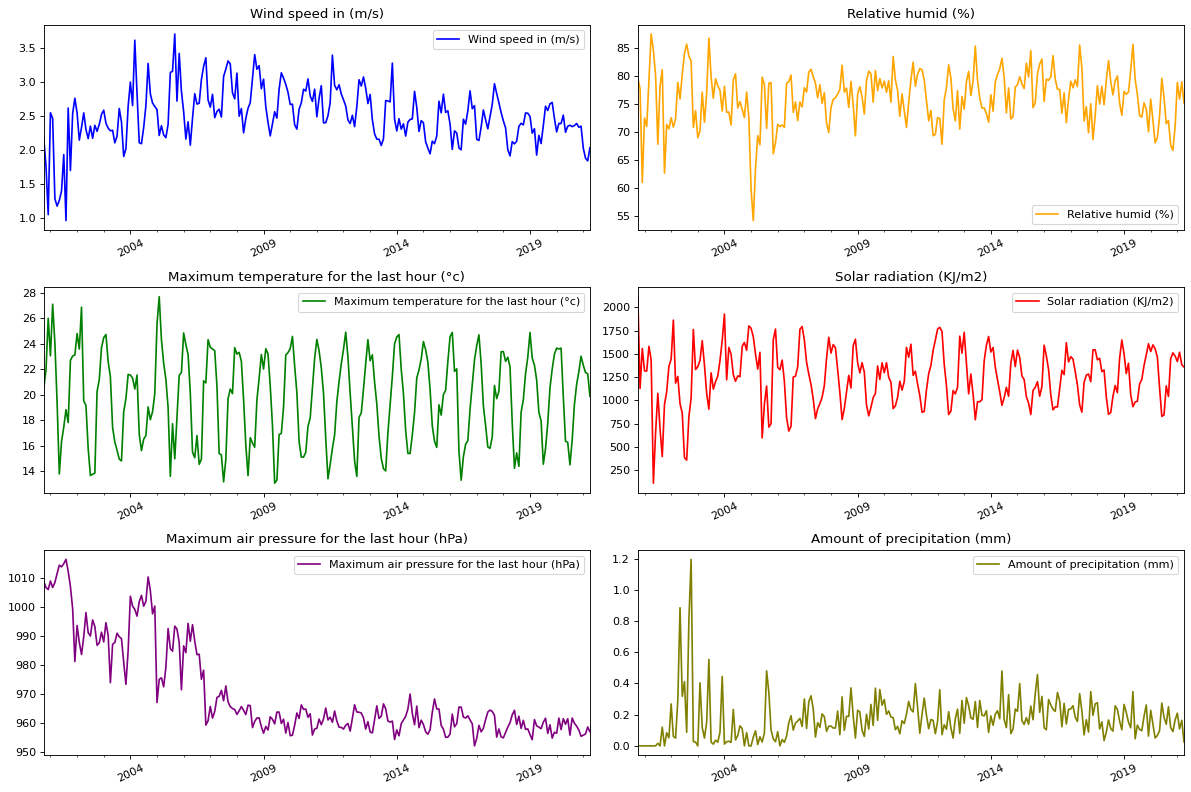

In [32]:
titles = ['Wind speed in (m/s)', 
        'Relative humid (%)', 
        'Maximum temperature for the last hour (°c)', 
        'Solar radiation (KJ/m2)', 
        'Maximum air pressure for the last hour (hPa)', 
        'Amount of precipitation (mm)']
        
feature_keys = ['wdsp', 'hmdy', 'tmax', 'gbrd', 'smax', 'prcp']
colors = [ "blue","orange","green","red","purple","olive"]


def show_raw_visualization(data):
    fig, axes = plt.subplots(
        nrows=3, ncols=2, figsize=(15, 10), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = df.index
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(titles[i]),
            rot=25,
        )
        ax.legend([titles[i]])
        ax.set(xlabel=None)
    plt.tight_layout()



show_raw_visualization(df)

# Step 1
Choose about 3-6 variables from your dataset (2-3 – target variables, the rest - predictors).

AdjClose, Volume - target variables
Open, High, Low, Close - predictors

In [33]:
feature_keys

['wdsp', 'hmdy', 'tmax', 'gbrd', 'smax', 'prcp']

In [34]:
targets = df[['wdsp', 'hmdy']]
predictors = df[['tmax', 'gbrd', 'smax', 'prcp']]
target_var_1 = 'wdsp'
target_var_2 = 'hmdy'
# all = predictors + targets
all = df[feature_keys]

# Step 2
Analyze stationarity of a process (for mathematical expectation and variance) for all chosen variables. Make them more stationary if needed.

In [35]:
from statsmodels.tsa.stattools import adfuller

values = all.values.reshape(-1).tolist()
result = adfuller(values)

print('Augmneted Dickey Fuller Statistic: %f' % result[0])
print('p-value: %f' % result[1])
 
print('Critical values:')
for k, v in result[4].items():
    print('\t%s: %.3f' % (k, v))

     

Augmneted Dickey Fuller Statistic: -7.937940
p-value: 0.000000
Critical values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


# Step 3
Analyze covariance or correlation function for chosen target variables and mutual correlation functions among predictors and targets.

In [36]:
all.corr()

,wdsp,hmdy,tmax,gbrd,smax,prcp
wdsp,1.000000,-0.174143,-0.055274,0.161143,-0.223950,0.138120
hmdy,-0.174143,1.000000,-0.451140,-0.556240,-0.053879,0.385971
tmax,-0.055274,-0.451140,1.000000,0.718723,-0.106658,-0.088321
gbrd,0.161143,-0.556240,0.718723,1.000000,-0.151342,-0.203555
smax,-0.223950,-0.053879,-0.106658,-0.151342,1.000000,-0.219312
prcp,0.138120,0.385971,-0.088321,-0.203555,-0.219312,1.000000


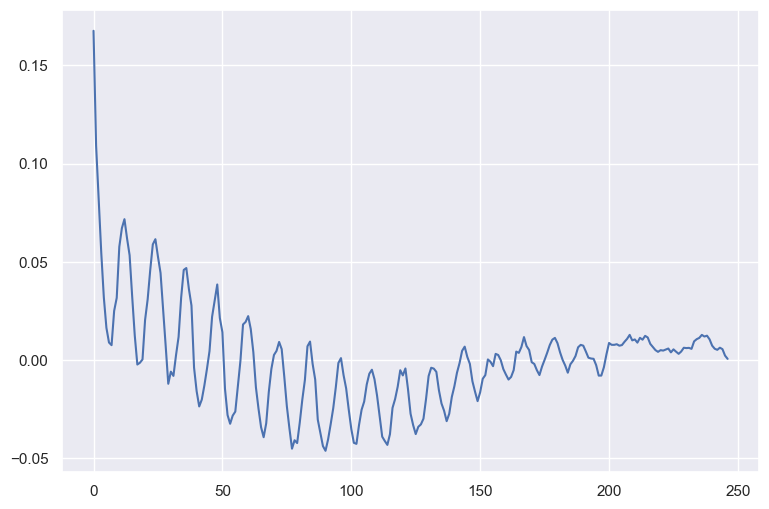

In [37]:
from statsmodels.tsa import stattools

sns.set(rc={'figure.figsize': (9, 6)})

plt.plot(stattools.acovf(all[target_var_1],fft=False))

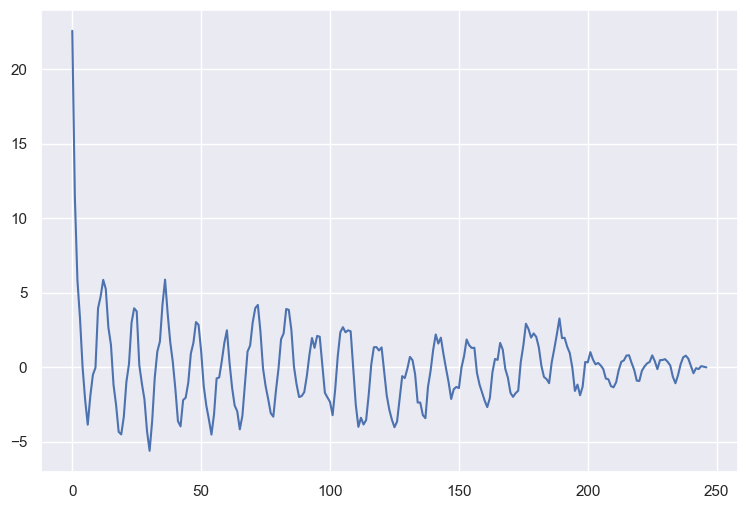

In [38]:
plt.plot(stattools.acovf(all[target_var_2],fft=False))

- `wdsp` -- Wind speed in (m/s)
- `hmdy` -- Relative humid (%) 
- `tmax` -- Maximum temperature for the last hour (°c)
- `gbrd` -- Solar radiation (KJ/m2)
- `smax` -- Maximum air pressure for the last hour (hPa)
- `prcp` -- Amount of precipitation (mm) (осадки)

<AxesSubplot:>

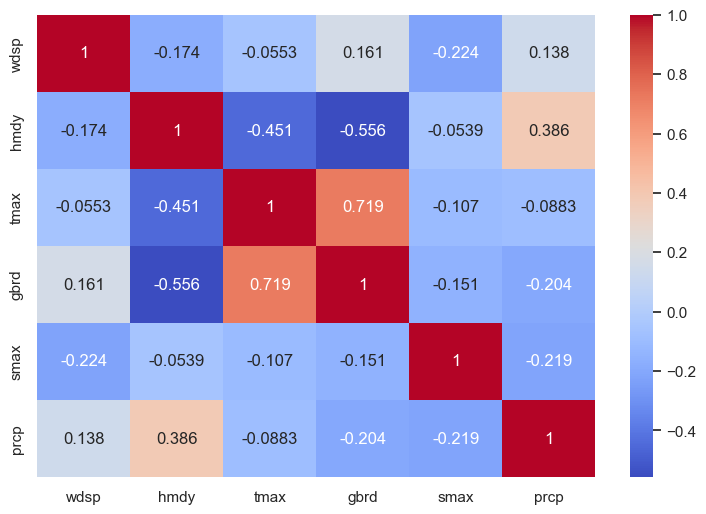

In [39]:
# sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(all.corr(), annot = True, fmt='.3g',cmap= 'coolwarm')

# Step 4
Filter high frequencies (noise) with chosen 2 filters for target variables.

In [40]:
from fedot.core.data.data import InputData
from fedot.core.pipelines.pipeline import Pipeline
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams
from fedot.core.pipelines.node import PrimaryNode, SecondaryNode
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

In [41]:
time_series = np.array(all[target_var_1])

# Define task - time series forecasting
# and forecast horizon 
task = Task(TaskTypesEnum.ts_forecasting,
                TsForecastingParams(forecast_length=25))

input_data = InputData(idx=np.arange(0, len(time_series)),
                       features=time_series, target=time_series,
                       task=task, data_type=DataTypesEnum.ts)

smoothing_node = PrimaryNode('smoothing') 
smoothing_node.custom_params = {'window_size': 7}

def node_fit_predict(node, input_data):
    """ Fit node and make prediction """
    node.fit(input_data)
    smoothed_output = node.predict(input_data)
    return smoothed_output

smoothed_output = node_fit_predict(smoothing_node, input_data)

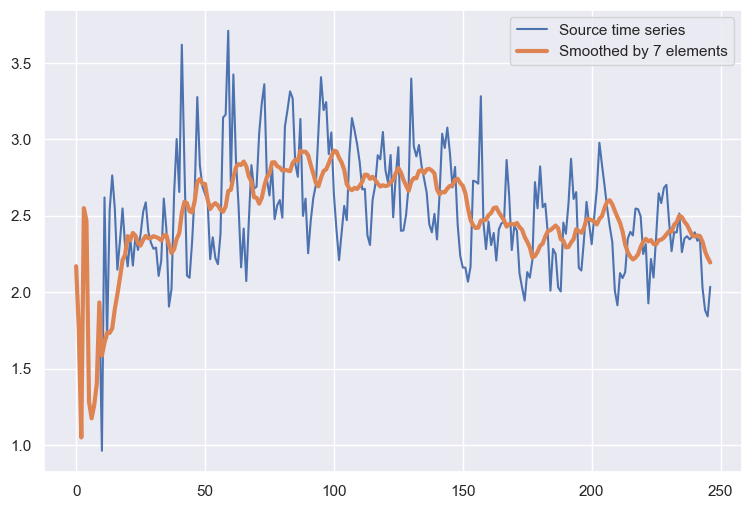

In [42]:
plt.plot(input_data.idx, input_data.target, label='Source time series')
plt.plot(smoothed_output.idx, smoothed_output.predict, label='Smoothed by 7 elements', linewidth=3)
plt.legend()
plt.show()

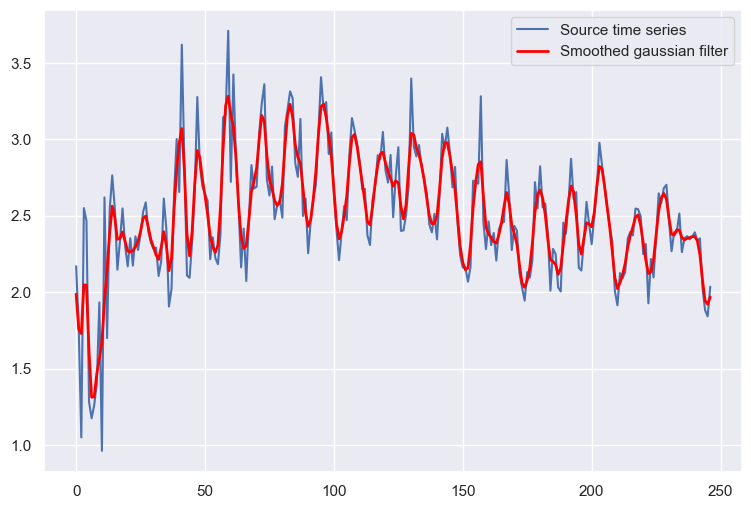

In [43]:
gaussian_node = PrimaryNode('gaussian_filter') 
gaussian_node.custom_params = {'sigma': 5}

smoothed_gaussian = node_fit_predict(gaussian_node, input_data)

plt.plot(input_data.idx, input_data.target, label='Source time series')
plt.plot(smoothed_gaussian.idx, smoothed_gaussian.predict, label='Smoothed gaussian filter', linewidth=2, c='red')
plt.legend()
plt.show()

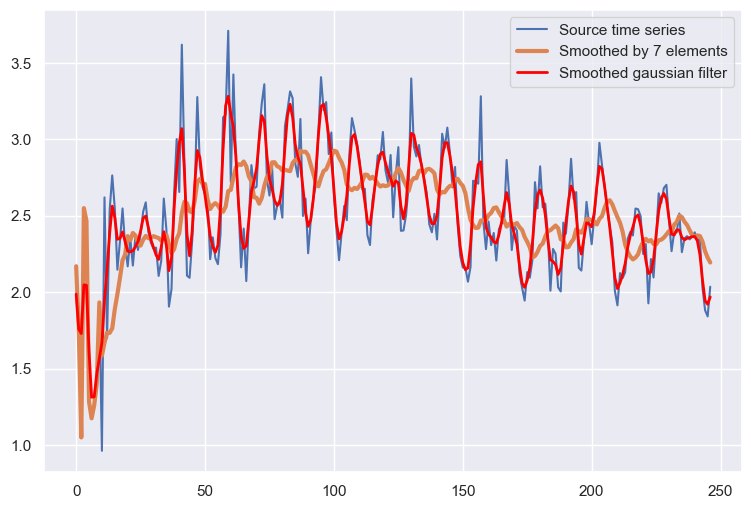

In [44]:
plt.plot(input_data.idx, input_data.target, label='Source time series')
plt.plot(smoothed_output.idx, smoothed_output.predict, label='Smoothed by 7 elements', linewidth=3)
plt.plot(smoothed_gaussian.idx, smoothed_gaussian.predict, label='Smoothed gaussian filter', linewidth=2, c='red')
plt.legend()
plt.show()

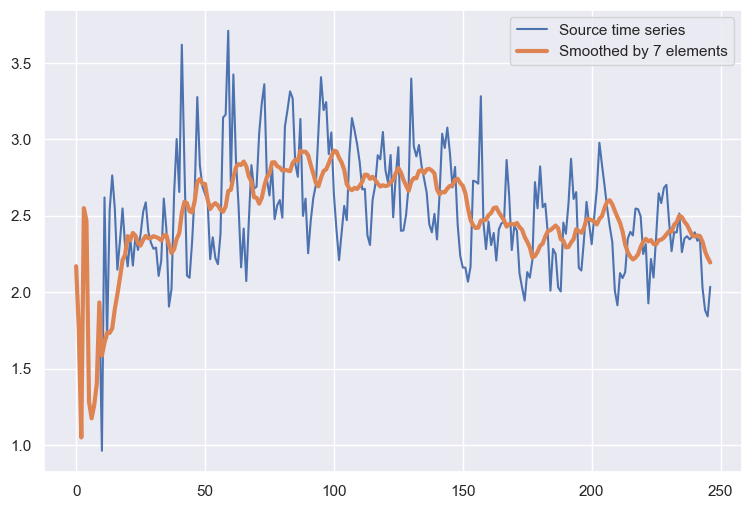

In [45]:
time_series_1 = np.array(all[target_var_2])

task = Task(TaskTypesEnum.ts_forecasting,
                TsForecastingParams(forecast_length=25))

input_data = InputData(idx=np.arange(0, len(time_series)),
                       features=time_series, target=time_series,
                       task=task, data_type=DataTypesEnum.ts)

smoothing_node = PrimaryNode('smoothing') 
smoothing_node.custom_params = {'window_size': 7}

def node_fit_predict(node, input_data):
    """ Fit node and make prediction """
    node.fit(input_data)
    smoothed_output = node.predict(input_data)
    return smoothed_output

smoothed_output = node_fit_predict(smoothing_node, input_data)

plt.plot(input_data.idx, input_data.target, label='Source time series')
plt.plot(smoothed_output.idx, smoothed_output.predict, label='Smoothed by 7 elements', linewidth=3)
plt.legend()
plt.show()

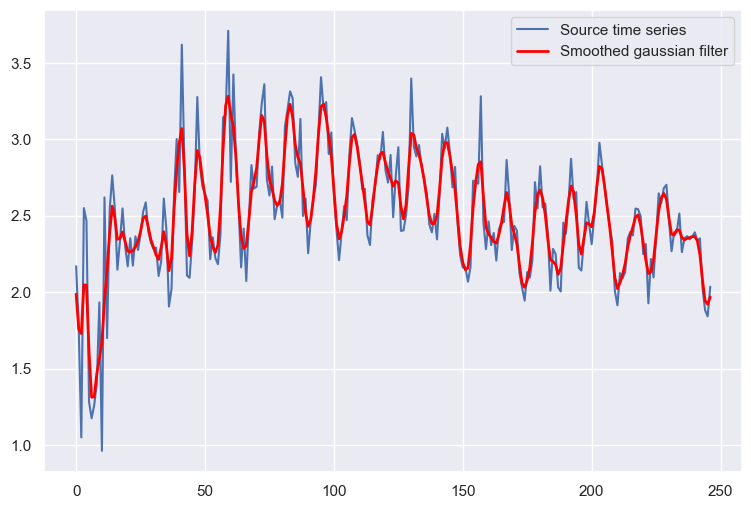

In [46]:
gaussian_node = PrimaryNode('gaussian_filter') 
gaussian_node.custom_params = {'sigma': 5}

smoothed_gaussian_v = node_fit_predict(gaussian_node, input_data)

plt.plot(input_data.idx, input_data.target, label='Source time series')
plt.plot(smoothed_gaussian_v.idx, smoothed_gaussian_v.predict, label='Smoothed gaussian filter', linewidth=2, c='red')
plt.legend()
plt.show()

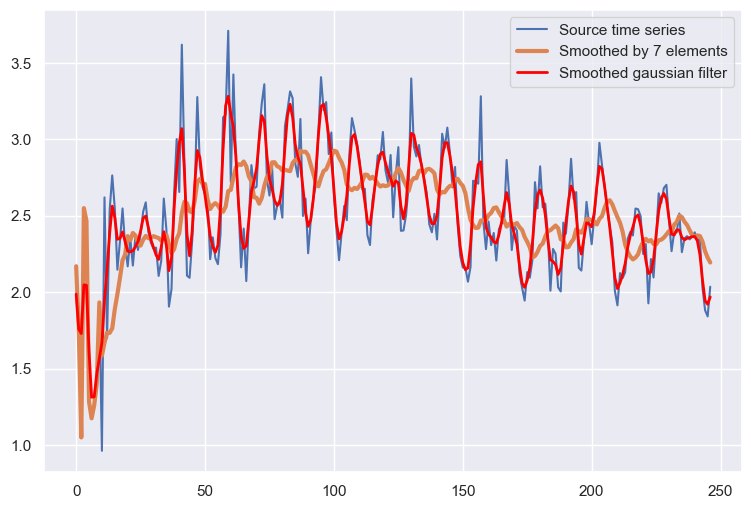

In [47]:
plt.plot(input_data.idx, input_data.target, label='Source time series')
plt.plot(smoothed_output.idx, smoothed_output.predict, label='Smoothed by 7 elements', linewidth=3)
plt.plot(smoothed_gaussian.idx, smoothed_gaussian.predict, label='Smoothed gaussian filter', linewidth=2, c='red')
plt.legend()
plt.show()

# Step 5 

247


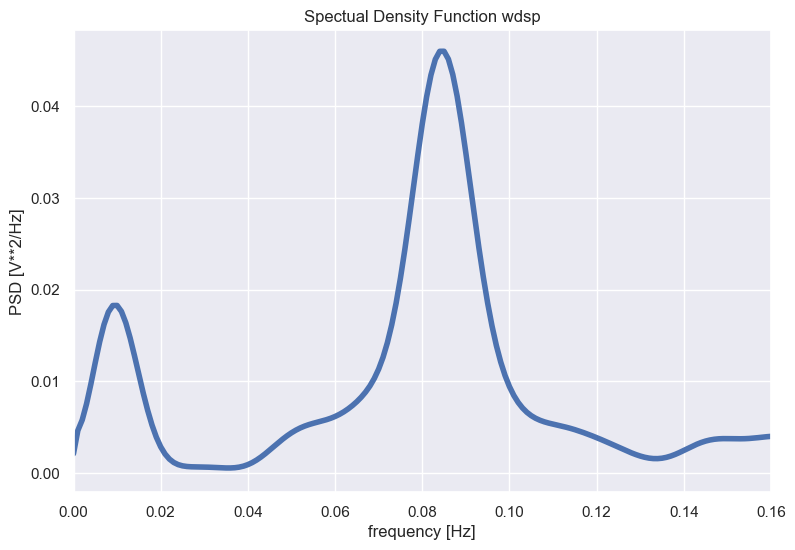

In [48]:
from scipy import signal 

def Spec_Den_Fun(data,variable,name):
    window_size = 20
    blackman = signal.blackman(M=window_size)
    bartlett = signal.windows.hann(M=window_size)
    print(len(data))
    f, Pxx_den = signal.welch(variable, fs=1, scaling='spectrum', nfft = 1000, nperseg=100)
    f_window, Pxx_den_window = signal.welch(variable, fs=1, window = blackman, nfft = 1000, scaling='spectrum')
    f_window_bart, Pxx_den_window_bart = signal.welch(variable, fs=1, window = bartlett, nfft = 1000, scaling='spectrum')
    plt.plot(f, Pxx_den, linewidth=4)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.xlim((0,0.16))
    plt.title("Spectual Density Function "+ name)
    plt.show()

Spec_Den_Fun(all, all[target_var_1], target_var_1)

247


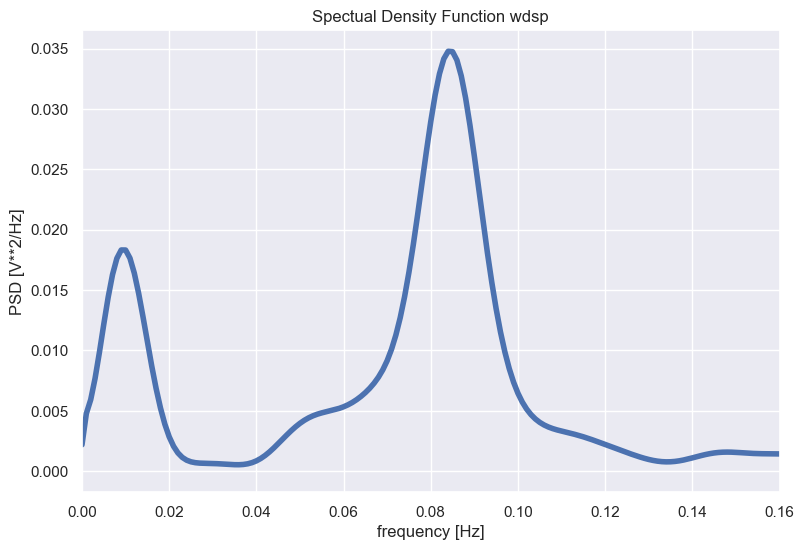

In [49]:
Spec_Den_Fun(smoothed_gaussian.predict,smoothed_gaussian.predict, target_var_1)

247


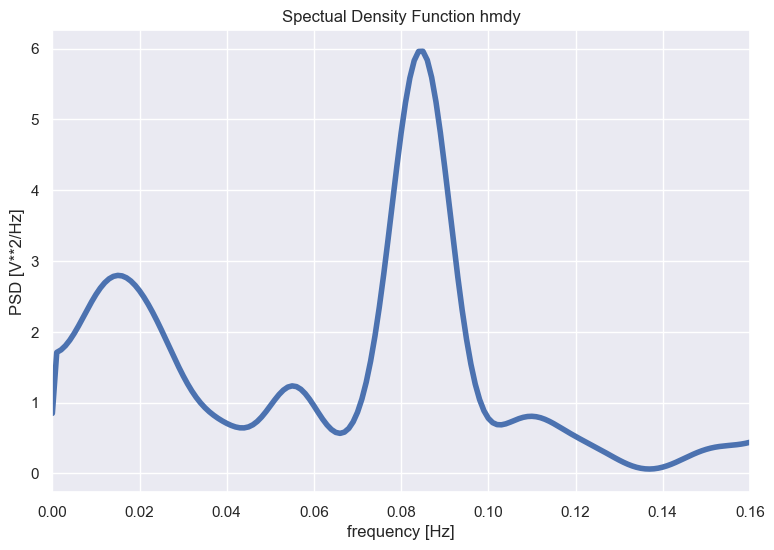

In [50]:
Spec_Den_Fun(all, all[target_var_2], target_var_2)

247


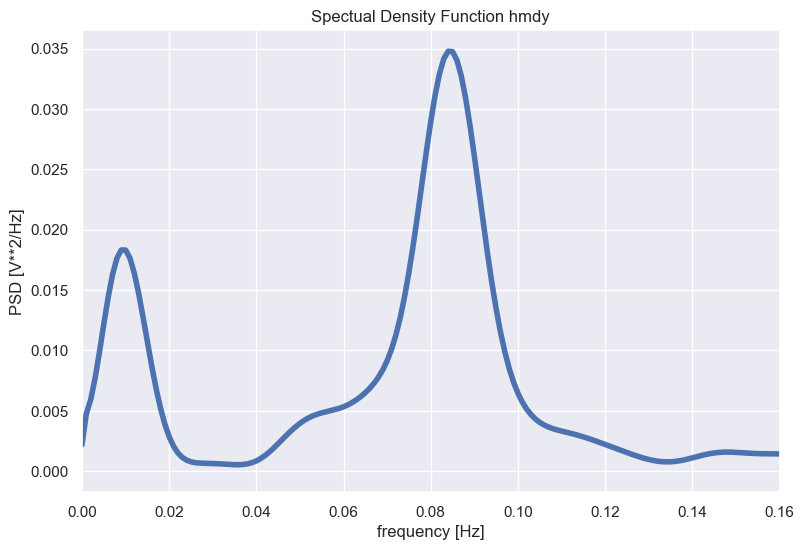

In [51]:
Spec_Den_Fun(smoothed_gaussian.predict, 
            smoothed_gaussian.predict,
            target_var_2)